### Importing Packages

In [1]:
import numpy as np

### Initializing Matrix X and Matrix Y with random numbers

In [2]:
mu = 2                     #Mean of Distribution
sigma = 0.01               #Standard Deviation of Data points
matX_shape = (100,2)       #Dimensions for Matrix X
matY_shape = (100,1)       #Dimensions for Matrix Y

In [3]:
#Initializing the bias column for b0
bias_column = np.ones(shape=(100,1))

In [4]:
matX = [[np.random.normal(mu,sigma) for i in range(matX_shape[1])] for j in range(matX_shape[0])]
matX = np.array(matX)

#Appending bias column in the Matrix X for calculating b0
matX = np.append(bias_column,matX,axis=1)

In [5]:
matY = [[np.random.uniform(1,2) for i in range(matY_shape[1])] for j in range(matY_shape[0])]
matY = np.array(matY)

### Function to multiply two Matrices
To multiply two matrices, we first verify the dimensions of both matrices.If its correct then we multiply rows with column iteratively and stores the result in the output matrix.

In [6]:
def multiply_matrices(matA,matB):
    #Validates if matrix A columns are same as matrix B rows
    if matA.shape[1] != matB.shape[0]:
        raise Exception('Invalid Matrix Dimensions')
    
    matC = np.zeros(shape=(matA.shape[0],matB.shape[1]))
    for i in range(len(matA)):
        for j in range(len(matB[0])):
            for k in range(len(matB)):
                matC[i][j] += matA[i][k] * matB[k][j]
    return matC

### Function to Transpose a given Matrix
To transpose a matrix, we take each column and convert this into a row

In [7]:
def transpose_matrix(matrix):
    result = []
    
    #Taking individual columns, flatten it into a single dimension 
    #row and then append it into our result matrix
    for i in range(matrix.shape[1]):
        curr_col = matrix[:,i]
        curr_col = curr_col.flatten()
        result.append(curr_col)
    
    return np.array(result)

### Function to Calculate the Determinant of a given Matrix
-To calculate the Minor matrix at row i and column j, we simply remove row i and column j and returns the remaining the matrix<br>
-To calculate the determinant of a matrix, we first breakdown the bigger matrix into smaller matrix of size 2x2 by hidding specific rows and columns.In the end we return the determinant of the 2x2 matrix which is simply the difference of 2 diagonal values

In [8]:
#This function is used to calculate the Minor matrix from a given bigger Matrix
def matrix_minor(matrix,i,j):
    return [[matrix[r][c] for c in range(len(matrix[0])) if c != j] for r in range(len(matrix)) if r != i]

In [9]:
def matrix_determinant(matrix):
    #If matrix is of size 2x2 then we can calculate determinant in traditional way without using Minors
    if len(matrix) == 2:
        return matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]
    
    det = 0
    for i in range(len(matrix)):
        det += ((-1)**i)*matrix[0][i]*matrix_determinant(matrix_minor(matrix,0,i))
    return det

### Function to Calculate the Inverse of the given Matrix
To calculate the Inverse of a matrix we do following steps:<br>
-If Matrix is of size 2x2 then we can simply swap the right diagonal values and change the signs of left diagonal.At last we multiply every value with 1/determinant.<br>
-If the matrix is bigger that 2x2 then we calculate the cofactors of that matrix and then transpose it.At last we multiply each value with 1/determinant

In [10]:
def matrix_inverse(matrix):
    #Calculates the given matrix determinant
    determinant = matrix_determinant(matrix)
    
    #If the matrix dimensions are 2x2 then we can calculate Inverse without using 
    #Minors and Cofactors, Simply by swapping position of left diagonal and 
    #inverting the signs of values in right diagonal
    if len(matrix) == 2:
        return (1/determinant) * np.array([[matrix[1][1], -1*matrix[0][1]],
                                  [-1*matrix[1][0], matrix[0][0]]])

    cofact = []
    for row in range(matrix.shape[0]):
        cofactRow = []
        for column in range(matrix.shape[1]):
            #Appending the determinant of the minor matrix in the cofactor matrix row
            cofactRow.append(((-1)**(row+column)) * matrix_determinant(matrix_minor(matrix,row,column)))
        cofact.append(cofactRow)
    
    #Transposing the Matrix of resultant Cofactor matrix
    cofact = transpose_matrix(np.array(cofact))
    
    #Returning (1/determinant) * cofactor matrix
    return (1/determinant) * np.array(cofact)

### Function to learn Linear Regression parameters b0 and b1

In [11]:
def learn_simple_linreg(X,Y):
    #Calculates the transpose of matrix X
    X_tran = transpose_matrix(X)
    
    #Calculate beta using equation b = (X^T.X)^-1.(X^T.Y)
    beta = multiply_matrices(matrix_inverse(multiply_matrices(X_tran,X)),multiply_matrices(X_tran,Y))
    return beta

### Function to Predict Y from Matrix X and beta vector

In [12]:
def predict_simple_linreg(X,beta):
    #Calculates y_hat using equation Y_hat = X.b
    y_hat = multiply_matrices(X,beta)
    return y_hat

### Calculating beta vector using Matrix X and Matrix Y

In [13]:
#Calculating the values for beta vector
beta = learn_simple_linreg(matX,matY)
print(beta)

[[-6.11504819]
 [ 3.24519383]
 [ 0.55697233]]


### Calculating Y_hat from matrix X and beta vector

In [14]:
y_hat = predict_simple_linreg(matX,beta)

### Plotting Actual Y and our Predicted Y_hat in a 3D Plot

In [15]:
#Importing matplotlib package
import matplotlib.pyplot as plt

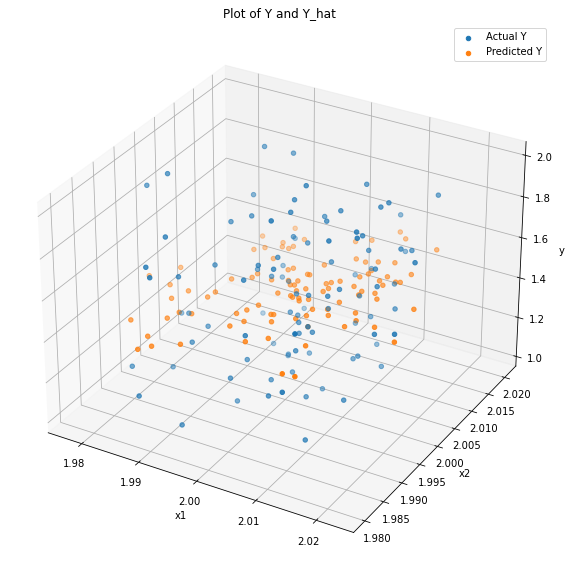

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(matX[:,1],matX[:,2],matY,label='Actual Y')
ax.scatter(matX[:,1],matX[:,2],y_hat,label='Predicted Y')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Plot of Y and Y_hat')
plt.legend()
plt.show()

From the above graph we can see that our predicted Y values are very close to the actual Y values with some Errors

### Using numpy.linalg lstsq for calculating beta vector

In [17]:
beta = np.linalg.lstsq(matX,matY,rcond=None)[0]
print(beta)

[[-6.11504803]
 [ 3.24519344]
 [ 0.55697204]]
